In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

using StaticArrays, DifferentialEquations, DynamicalSystems
x = y = z = -15..15
box = x × y × z
using CairoMakie

  Activating project at `D:\Science\Code\Julia\envr`


In [2]:
function TM(u, p, t)
    
    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 1000.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [16]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 =  -1.50947;

In [17]:
"""
SA[0.5287662926292962
         0.9611190233149197
         0.41838101329795496]
"""
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[0.664750570875855
 0.947145694859555
 0.4368659535211039]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.664750570875855
 0.947145694859555
 0.4368659535211039

In [18]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.664751, 0.947146, 0.436866]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.50947]

### trajectory

In [19]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

### Graphics

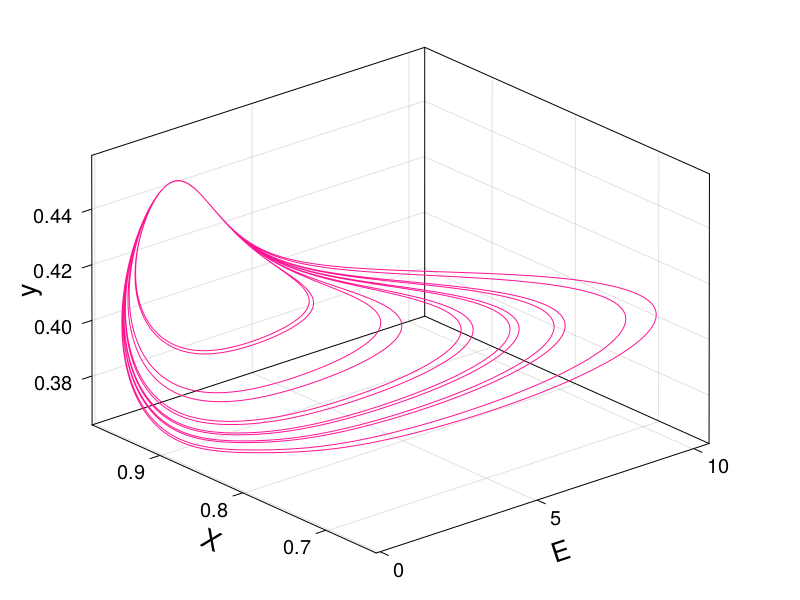

In [20]:
lb_size = 27
tck_size = 20
ts, tf = 200000, 1000000
f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "E", ylabel = "X", zlabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr[ts:tf, 1], tr[ts:tf, 2], tr[ts:tf, 3], linewidth = 1.0, color = :deeppink)
f

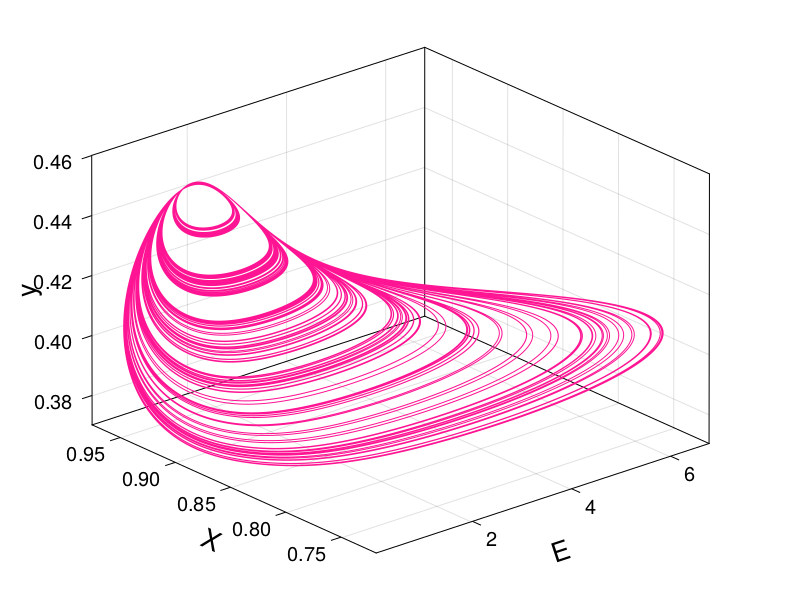

In [14]:
lb_size = 27
tck_size = 20
ts, tf = 200000, 1000000
f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "E", ylabel = "X", zlabel = "y",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr[ts:tf, 1], tr[ts:tf, 2], tr[ts:tf, 3], linewidth = 1.0, color = :deeppink)
f

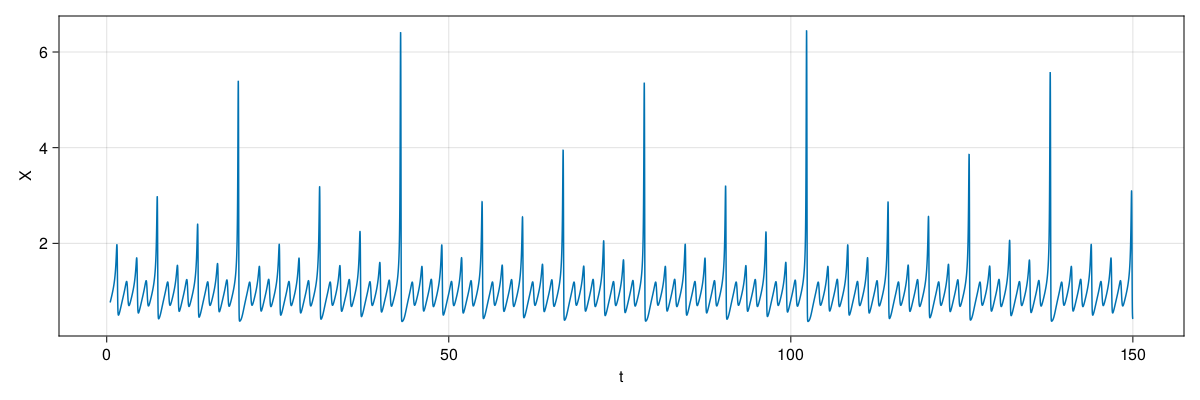

In [15]:
ts, tf = 500, 150000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X")
lines!(axis, trange[ts:tf], tr[ts:tf, 1])
f

In [1016]:
struct Modes
    description
    params
    u0
end

Mode: Chaos (EEs?)
params = (\a)
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.5108395

u0 = SA[0.5287662926292962
        0.9611190233149197
        0.41838101329795496]

In [1021]:
params = ("α"=>α, "τ"=>τ, "τD"=>τD, "τy"=>τy, "J"=>J, "xthr"=>xthr, "ythr"=>ythr, "U0"=>U0, "ΔU0"=>ΔU0, "β"=>β, "I0"=>I0)
description = "Chaos";